FOR BATTERY HEALTH AND CHARGINGS 

In [22]:
#HERE WE ADD THE DATA OF THE BATTERY IN CHARGING CYCLES,TEMPERATURE,VOLTAGE,AMPERE AND USAGE HOURS 
import pandas as pd
import numpy as np

np.random.seed(42)
n = 500 

#NOW ITS TRAINING TIME 
data = pd.DataFrame({
    'cycles': np.random.randint(100, 1000, n),
    'temperature_C': np.random.normal(35, 5, n),
    'voltage_V': np.random.normal(3.7, 0.2, n),
    'current_A': np.random.normal(0.5, 0.1, n),
    'usage_hours': np.random.randint(200, 5000, n)
})

data['health_percent'] = 100 - (data['cycles']*0.05 + data['temperature_C']*0.3 + data['usage_hours']*0.01)

data['health_percent'] = data['health_percent'].clip(lower=10)

data.head(10)

,cycles,temperature_C,voltage_V,current_A,usage_hours,health_percent
0,202,44.447738,3.626605,0.531674,4941,27.155679
1,535,31.620976,3.794479,0.650966,2654,37.223707
2,960,30.432937,3.733283,0.414273,1666,26.210119
3,370,32.724834,3.504804,0.394170,3874,32.942550
4,206,32.936192,3.696022,0.569270,1577,64.049142
5,171,37.978218,3.766729,0.545754,2797,52.086535
6,800,25.042311,3.687141,0.602884,341,49.077307
7,120,37.130129,3.431459,0.556979,2859,54.270961
8,714,32.293573,4.040286,0.443224,4796,10.000000
9,221,38.884115,3.717540,0.543219,1039,66.894765


In [9]:
#USING LINEAR REGRESSION MODEL WE PREDICT THE BATTERY HEALTH 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = data.drop('health_percent', axis=1)
y = data['health_percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate data WITH LINEAR REGRESSION 

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds) #HOW FAR IT IS DAMAGED 
r2 = r2_score(y_test, preds) # FOR CLOSENESS OF PREDICTION

print(f"Linear Regression MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression MAE: 1.59
R² Score: 0.97


In [21]:
# TESTING THE PREDICTION OF TWO BATTERY TEST

test_batch = pd.DataFrame([
    {'cycles': 600, 'temperature_C': 40, 'voltage_V': 3.6, 'current_A': 0.52, 'usage_hours': 2200},
    {'cycles': 300, 'temperature_C': 35, 'voltage_V': 3.7, 'current_A': 0.48, 'usage_hours': 1100}
])

predicted_health = model.predict(test_batch)

for i, health in enumerate(predicted_health, start=1):
    print(f"🔋 Reading {i}: Predicted Health = {health:.2f}%")

🔋 Reading 1: Predicted Health = 36.78%
🔋 Reading 2: Predicted Health = 62.18%


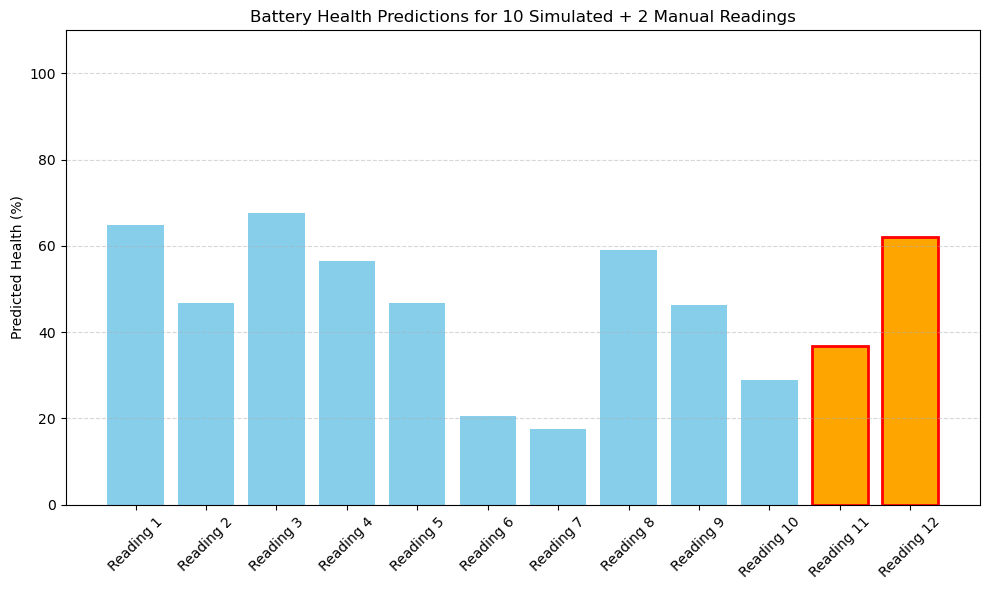

In [29]:
#PLOTTING ITS GRAPH 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, all_preds, color=['skyblue']*10 + ['orange']*2)

# Highlight the manual readings
for i in range(10, 12):
    bars[i].set_edgecolor('red')
    bars[i].set_linewidth(2)

plt.xticks(rotation=45)
plt.ylabel('Predicted Health (%)')
plt.title('Battery Health Predictions for 10 Simulated + 2 Manual Readings')
plt.ylim(0, 110)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
#SOLDER FAULT AND OVERLOAD RISK DETECTOR

import pandas as pd
import numpy as np

np.random.seed(101)
n = 300
data2 = pd.DataFrame({
    'voltage_V': np.round(np.random.normal(5, 0.8, n), 2),
    'current_A': np.round(np.random.normal(0.5, 0.2, n), 2),
    'resistance_Ohm': np.round(np.random.normal(10, 2, n), 2),
    'temperature_C': np.round(np.random.normal(38, 5, n), 1)
})

data2['fault_flag'] = np.where(
    (data2['voltage_V'] > 6.0) | 
    (data2['current_A'] > 0.9) | 
    (data2['temperature_C'] > 45),
    1, 0 
)
data2.head(10) # FOR ONLY FIRST 10 READINGS TO SHOW IN DATA 


,voltage_V,current_A,resistance_Ohm,temperature_C,fault_flag
0,7.17,0.22,7.68,40.7,1
1,5.50,0.56,10.68,30.6,0
2,5.73,0.70,8.21,41.5,0
3,5.40,0.57,10.87,45.8,1
4,5.52,0.68,9.44,48.8,1
5,4.74,0.77,12.03,38.9,0
6,4.32,0.42,11.83,39.5,0
7,5.48,0.89,14.24,37.5,0
8,3.39,0.33,12.53,46.5,1
9,5.59,0.46,11.07,40.7,0


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.94      0.97        60
weighted avg       0.98      0.98      0.98        60



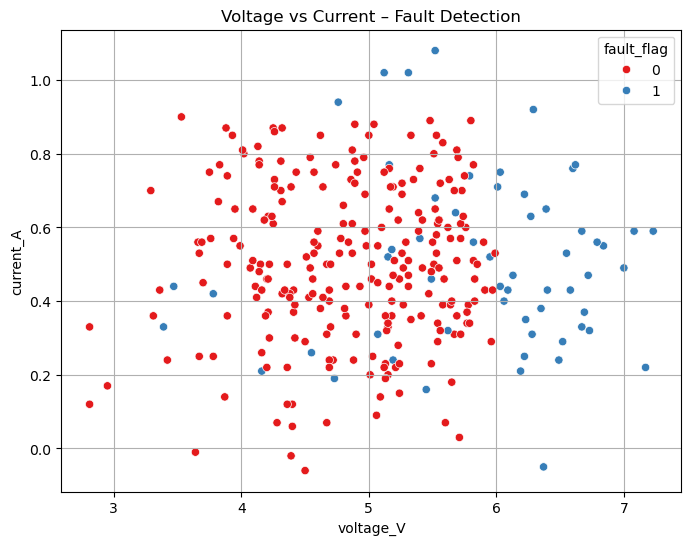

In [31]:
 

#CLASSIFICATION FOR FAULT DETECTION 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X2 = data2.drop('fault_flag', axis=1)
y2 = data2['fault_flag']

#(TRAINING TIME)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train2, y_train2)

pred_faults = clf.predict(X_test2)
print(classification_report(y_test2, pred_faults))

#TESTING TIME FOR FAULT PREDICTION
test_faults = pd.DataFrame([
    {'voltage_V': 6.2, 'current_A': 0.95, 'resistance_Ohm': 8.0, 'temperature_C': 47.5},  
    {'voltage_V': 5.1, 'current_A': 0.55, 'resistance_Ohm': 10.5, 'temperature_C': 40.0}, 
    {'voltage_V': 6.0, 'current_A': 0.88, 'resistance_Ohm': 9.5, 'temperature_C': 46.0}, 
    {'voltage_V': 4.7, 'current_A': 0.45, 'resistance_Ohm': 11.0, 'temperature_C': 36.0},
    {'voltage_V': 5.9, 'current_A': 1.02, 'resistance_Ohm': 7.5, 'temperature_C': 48.0}  
])


#PLOTTING THE GRAPH of all readings

import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data2['voltage_V'], y=data2['current_A'], hue=data2['fault_flag'], palette='Set1')
plt.title("Voltage vs Current – Fault Detection")
plt.grid(True)
plt.show()